In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import numpy.random as npr
from PIL import Image
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
import warnings
import json
import gc
from sklearn.model_selection import ParameterGrid


warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('bmh')

## Auxilary functions

In [15]:
def plot_learning_curve(history, title):
    key_names = list(history.keys())
    colors = ['-r','--b','-og','-.k']

    plt.figure(figsize=(8,5))
    for i in range(len(key_names)):
        plt.plot(history[key_names[i]], colors[i], label=key_names[i])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(fontsize=15,ncol=2)
    plt.title('Learning Curves for ' + title, size=15);

# 1. Flower species classification

In [3]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

In [4]:
# Loading Training Data
X_train = np.load('flower_species_classification/data_train.npy').T
t_train = np.load('flower_species_classification/labels_train.npy')

print(X_train.shape, t_train.shape)

(1658, 270000) (1658,)


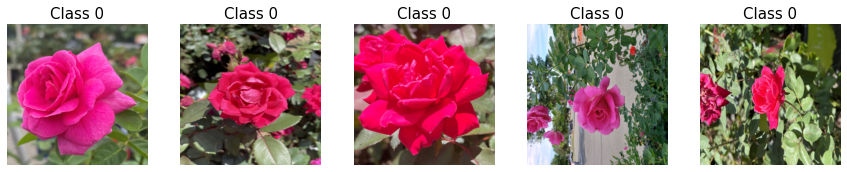

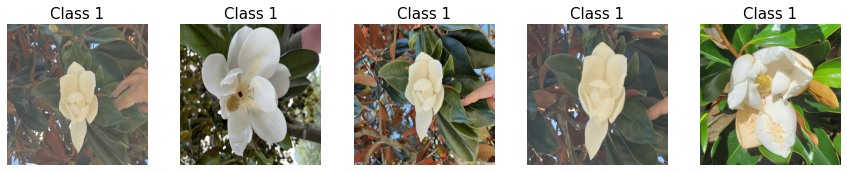

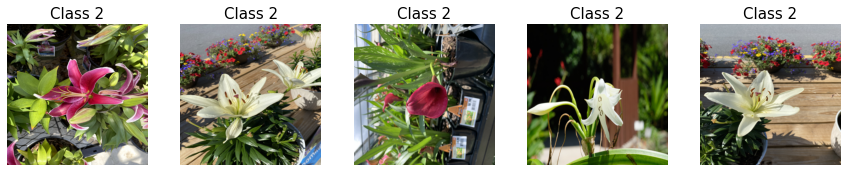

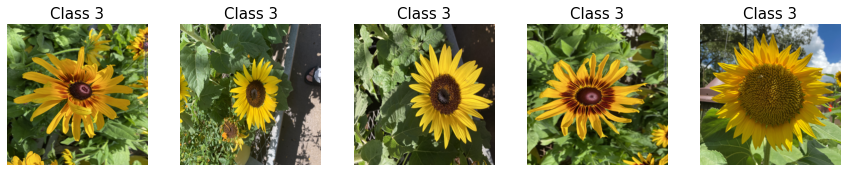

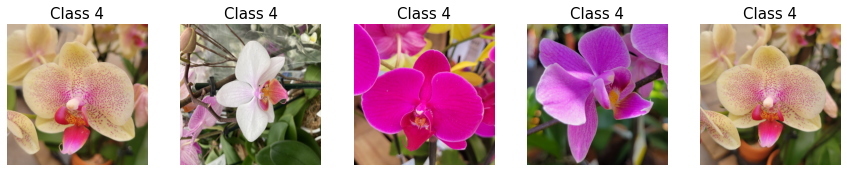

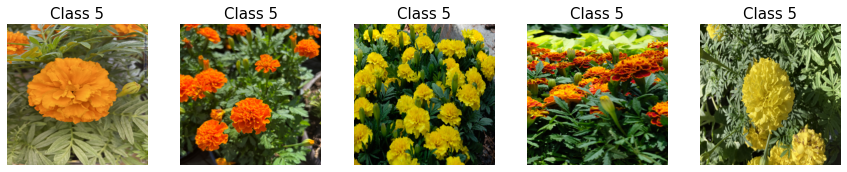

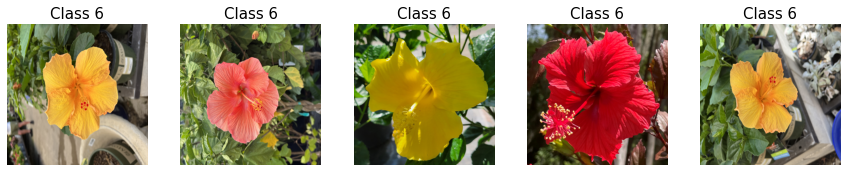

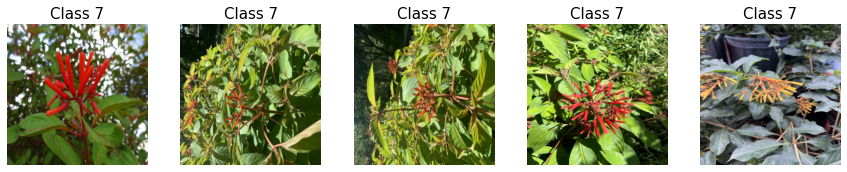

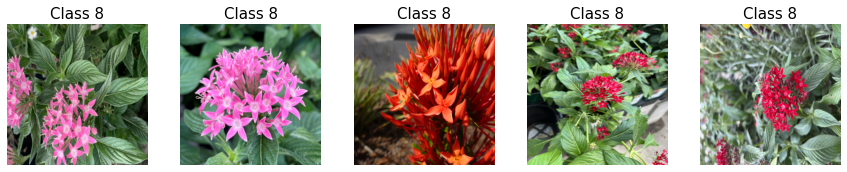

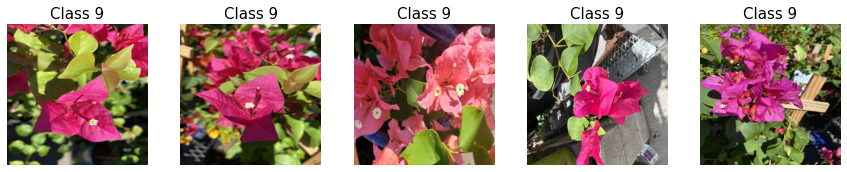

In [5]:
# Displaying some random examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(t_train==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(5):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_train[rnd_sample[j],:].reshape((300,300,3)))
        plt.axis('off');plt.title('Class '+str(int(t_train[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

In [6]:
# Normalizing 
X_train_norm = X_train.reshape(-1, 300, 300, 3) / 255.0

# training and validation - stratified split
X_train, X_val, t_train, t_val = train_test_split(X_train_norm, 
                                                  t_train, 
                                                  test_size=0.2, 
                                                  random_state=7, 
                                                  stratify=t_train)

In [7]:
# # Define a set of hyper parameters to try
param_grid = {
    'conv_layers': [3, 4],
    'dense_layers': [2, 3],
    'dropout_rate': [0.0, 0.5],
    'learning_rate': [0.001, 0.0001]
}

# Too large for training, OOM errors
# param_grid = {
#     'conv_layers': [3, 4],
#     'conv_units' : [256],
#     'dense_layers': [2, 3], 
#     'dense_units': [512],
#     'dropout_rate': [0.0, 0.5],
#     'learning_rate': [0.001, 0.0001],
#     'activation': ['relu', 'tanh'],
# }

In [8]:
def AddConvLayers(model, conv_layers, conv_units, activation, dropout_rate):
    # Input layer
    model.add(tf.keras.layers.Conv2D(conv_units/2, (3, 3), activation='relu', input_shape=(300, 300, 3)))
    
    for i in range(1, int(conv_layers)):
        model.add(tf.keras.layers.Conv2D(conv_units * 2, (3, 3), activation=activation))
        model.add(tf.keras.layers.MaxPooling2D(2))
        
    return model

def AddDenseLayers(model, dense_layers, dense_units, activation, dropout_rate):
    for _ in range(dense_layers):
        model.add(tf.keras.layers.Dense(dense_units, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
        dense_units /= 2
    return model

In [1]:
# best_model = None
# best_history = None
# best_val_accuracy = 0
# best_hyper_params = {}

# hyper_params = ParameterGrid(param_grid)
# i, n = 1, len(hyper_params)

# for params in hyper_params:
#     tf.keras.backend.clear_session()
#     gc.collect()
    
#     print(f"Training model {i}/{n} with params:")
#     print(params)
#     curr_conv_layers, curr_conv_units, curr_dense_layers, curr_dense_units, curr_drop_out, curr_lr, curr_activation = params['conv_layers'], params['conv_units'], params['dense_layers'], params['dense_units'], params['dropout_rate'], params['learning_rate'], params['activation']
    
#     # Constructing the model
#     model = keras.models.Sequential()
#     model = AddConvLayers(model, curr_conv_layers, curr_conv_units, curr_activation, curr_drop_out)
#     model.add(tf.keras.layers.Flatten())
#     model = AddDenseLayers(model, curr_dense_layers, curr_dense_units, curr_activation, curr_drop_out)
#     model.add(tf.keras.layers.Dense(10, activation='softmax'))
#     optimizer = keras.optimizers.Adam(learning_rate=params['learning_rate'])
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Train the model
#     history = model.fit(
#         X_train, t_train, epochs=50, validation_data=(X_val, t_val),
#         callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)],
#         verbose = 0,
#         batch_size = 10
#     )
    
#     max_val_accuracy = max(history.history['val_accuracy'])
#     if max_val_accuracy > best_val_accuracy:
#         best_val_accuracy = max_val_accuracy
#         best_model = model
#         best_history = history
#         best_hyper_params = params
        
#     del model
#     tf.keras.backend.clear_session()
#     gc.collect()
    
#     i += 1

In [29]:
# model.save("best_model1.h5")

In [37]:
print(f"The best model has with validation accuracy of {best_val_accuracy} and hyper params")
print(best_hyper_params)

The best model has with validation accuracy of 0.8192771077156067 and hyper params
{'conv_layers': 4, 'dense_layers': 2, 'dropout_rate': 0.0, 'learning_rate': 0.0001}


In [37]:
# serializable_history = {k: [float(vi) for vi in v] for k, v in best_history.history.items()}
# with open("best_history1", 'w') as f:
#     json.dump(serializable_history, f)

In [3]:
with open("best_history1", 'r') as f:
    best_history1 = json.load(f)

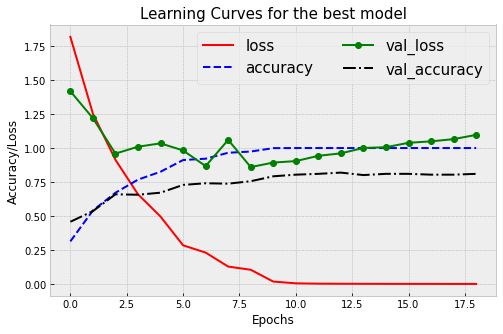

In [12]:
plot_learning_curve(best_history1, "the best model")

### we can observe that the model shows a convergence which accounts for the leaarning ability. The loss curve is steep and does not distort, which indicates a good generalization.

# Dataset 2: Car Detection Dataset

In [3]:
bbox = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')
bbox

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


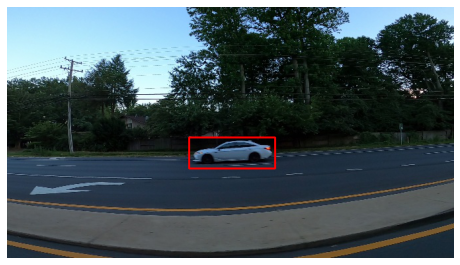

In [11]:
# Select a random sample
random_index = 19
sample = bbox.iloc[random_index]

# Load the corresponding image
filename = 'car_detection_dataset/training_images/' + sample['image']
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Extract bounding box coordinates and convert them to integers
x_min, y_min, x_max, y_max = map(int, sample[1:])

# Draw the bounding box on the image
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()
plt.close()

In [4]:
# Initialize arrays for images and labels
X_train = []
t_train = []

# Load and preprocess images
for i in range(len(bbox)):
    filename = 'car_detection_dataset/training_images/' + bbox['image'][i]
    image = np.array(Image.open(filename))
    X_train.append(image)
    t_train.append(bbox.iloc[i, 1:].values)

# Normalize pixel values
X_train = np.array(X_train, dtype='float32') / 255.0 
t_train = np.array(t_train, dtype='float32')

In [4]:
# Split data into training and validation sets
X_train, X_val, t_train, t_val = train_test_split(X_train, 
                                                  t_train, 
                                                  test_size=0.2, 
                                                  random_state=42)

In [8]:
# # Define a set of hyper parameters to try
param_grid = {
    'conv_layers': [3, 4],
    'dense_layers': [2, 3],
    'dropout_rate': [0.0, 0.5],
    'learning_rate': [0.001, 0.0001]
}

# Too large for training, OOM errors
# param_grid = {
#     'conv_layers': [3, 4],
#     'conv_units' : [128],
#     'dense_layers': [2], 
#     'dense_units': [256],
#     'dropout_rate': [0.0, 0.5],
#     'learning_rate': [0.001, 0.0001],
#     'activation': ['relu', 'tanh'],
# }

In [9]:
def AddConvLayers(model, conv_layers, conv_units, activation, dropout_rate):
    # Input layer
    model.add(tf.keras.layers.Conv2D(conv_units/2, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    
    for i in range(1, int(conv_layers)):
        model.add(tf.keras.layers.Conv2D(conv_units, (3, 3), activation=activation))
        model.add(tf.keras.layers.MaxPooling2D(2))
        
    return model

def AddDenseLayers(model, dense_layers, dense_units, activation, dropout_rate):
    for _ in range(dense_layers):
        model.add(tf.keras.layers.Dense(dense_units, activation=activation))
        model.add(tf.keras.layers.Dropout(dropout_rate))
        dense_units /= 2
    return model

In [11]:
# best_model2 = None
# best_history2 = None
# best_val_loss = float('inf')
# best_hyper_params2 = {}

# hyper_params = ParameterGrid(param_grid)
# i, n = 1, len(hyper_params)

# for params in hyper_params:
#     tf.keras.backend.clear_session()
#     gc.collect()
    
#     print(f"Training model {i}/{n} with params:")
#     print(params)
#     curr_conv_layers, curr_conv_units, curr_dense_layers, curr_dense_units, curr_drop_out, curr_lr, curr_activation = params['conv_layers'], params['conv_units'], params['dense_layers'], params['dense_units'], params['dropout_rate'], params['learning_rate'], params['activation']
    
#     model = keras.models.Sequential()
#     model = AddConvLayers(model, curr_conv_layers, curr_conv_units, curr_activation, curr_drop_out)
#     model.add(tf.keras.layers.Flatten())
#     model = AddDenseLayers(model, curr_dense_layers, curr_dense_units, curr_activation, curr_drop_out)
#     model.add(tf.keras.layers.Dense(4)) 
#     optimizer = keras.optimizers.Adam(learning_rate=params['learning_rate'])
#     model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#     # Train the model
#     history = model.fit(
#         X_train, t_train, epochs=50, validation_data=(X_val, t_val),
#         callbacks=[EarlyStopping(patience=10, verbose=1)],
#         verbose = 0,
#         batch_size = 5
#     )
    
#     min_val_loss = min(history.history['val_loss'])
#     if min_val_loss < best_val_loss:
#         best_val_loss = min_val_loss
#         best_model2 = model
#         best_history2 = history
#         best_hyper_params2 = params
        
#     del model
#     tf.keras.backend.clear_session()
#     gc.collect()
#     i += 1

In [22]:
# best_model2.save("best_model2.h5")

In [26]:
print(f"The best model has with loss of {best_val_loss} and hyper params")
print(best_hyper_params2)

The best model has with loss of 16298.4296875 and hyper params
{'conv_layers': 4, 'dense_layers': 2, 'dropout_rate': 0.0, 'learning_rate': 0.001}


In [27]:
# serializable_history = {k: [float(vi) for vi in v] for k, v in best_history2.history.items()}
# with open("best_history2", 'w') as f:
#     json.dump(serializable_history, f)

In [13]:
with open("best_history2", 'r') as f:
    best_history2 = json.load(f)

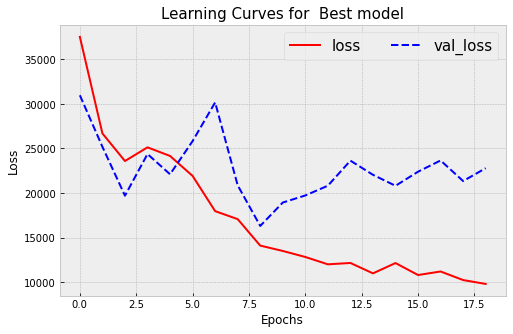

In [16]:
plot_learning_curve(best_history2, " Best model")

### we can observe that the model shows a sporadic curve which preturbs in the middle phase of learning. This can be an indication of overfitting or underfitting. The validation loss is greater than the training loss in the end which indicates that the final model is not overfitting.

## Various questions posed in the project have been answered in the Report